In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import shutil

### Record to be analyzed


In [26]:
smt_label = "20180709-210116"
train = False
epoch = 4
diag_dim = 32

In [27]:
if train:
    train_s = "train"
else:
    train_s = "test"
feature_zip = "../produced_data/{}/{}_{}.zip".format(smt_label, train_s, epoch)
robustness_folder = "../produced_data/{}/robustness_{}_{}/robustness_measures".format(smt_label, train_s, epoch)
out_folder = "../generated_plots/some_analysis"
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

### Some analysis functions

In [28]:
def get_full_output_path(file_name):
    return os.path.join(out_folder, file_name)

def feature_value_hist(feature_values):
    non_zero = []
    vals = []
    for i in range(len(feature_values)):
        print("feature {}".format(i))
        m = np.mean(feature_values[i])
        s = np.std(feature_values[i])
        print(m)
        print(s)
        plt.figure()
        plt.xlabel("Feature {}".format(i))
        plt.ylabel("Count")
        plt.title("Value histogram for feature {}".format(i))
        plt.hist(feature_values[i], edgecolor="black")
        plt.savefig(os.path.join(out_folder, "{}_hist.pdf".format(i)))
        plt.close()
        if m > 1:
            non_zero.append(str(i))
            vals.append((m, s))
    return non_zero, vals
        
def feature_agreement(in_folder, feature_set, prefix, file_name, measure_name="ICC_A1"):
    # Retrieve computation dic
    plt.figure()
    comps = []
    comp_names = []
    for name in os.listdir(in_folder):
        if name.startswith(prefix) and name.endswith(".json"):
            dic = json.load(open(os.path.join(in_folder, name), 'r'))
            comps.append(dic)
            comp_names.append("_".join(name.split("_")[:-1]))
    
    all_values = []
    for comp, name in zip(comps, comp_names):
        values = []
        for f in feature_set:
            values.append(comp[f][measure_name])
        all_values.append(values)
    plt.hist(all_values, edgecolor="black", label=comp_names)
    plt.xlabel(measure_name)
    plt.ylabel("Number of features")
    plt.title("Feature reproducibility on test-retest pairs")
    plt.legend(loc=0, ncol=1)
    plt.tight_layout
    plt.show()
    oname = "{}_{}_{}.pdf".format(file_name, prefix, measure_name)
    plt.savefig(get_full_output_path(oname))
    plt.close()

### Load features

In [29]:
dest_path = "../produced_data/{}/{}_{}".format(smt_label, train_s, epoch)
shutil.unpack_archive(feature_zip, dest_path, 'zip')
features = []
for name in os.listdir(dest_path):
    f = np.load(os.path.join(dest_path, name))
    features.append(f)
features = np.array(features).T
shutil.rmtree(dest_path)

### Do analysis

In [30]:
non_zero, non_zero_vals = feature_value_hist(features)

feature 0
0.07765467
0.0
feature 1
0.071048066
7.450581e-09
feature 2
0.07822154
7.450581e-09
feature 3
120.470924
89.25466
feature 4
144.19954
111.66899
feature 5
0.05845835
3.7252903e-09
feature 6
114.16485
93.14245
feature 7
0.07862014
7.450581e-09
feature 8
0.07637389
7.450581e-09
feature 9
166.7507
114.82192
feature 10
0.07656402
7.450581e-09
feature 11
0.076678336
0.0
feature 12
0.0017667672
1.1641532e-10
feature 13
0.07801793
7.450581e-09
feature 14
168.0605
177.16185
feature 15
0.06896225
0.0
feature 16
135.95792
112.05454
feature 17
0.07754082
7.450581e-09
feature 18
150.66196
101.7656
feature 19
130.27661
100.91517
feature 20
0.07213897
7.450581e-09
feature 21
0.044671867
3.7252903e-09
feature 22
158.59818
113.00121
feature 23
0.0090624
9.313226e-10
feature 24
0.077132486
0.0
feature 25
0.074939735
1.4901161e-08
feature 26
0.077545725
0.0
feature 27
0.076973036
0.0
feature 28
0.068959296
0.0
feature 29
0.07571079
1.4901161e-08
feature 30
126.33637
115.85051
feature 31
0.07817

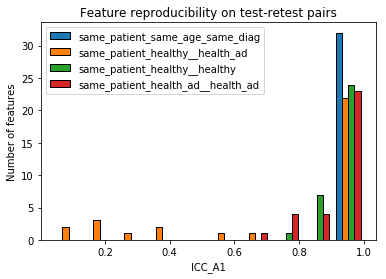

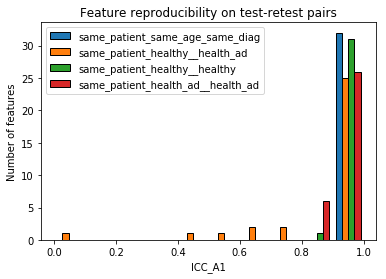

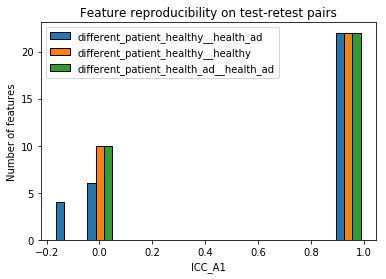

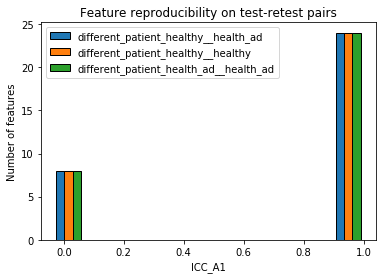

In [31]:
enc_dim = len(features)
not_reg = set([str(i) for i in range(0, enc_dim - diag_dim)])
reg = set([str(i) for i in range(enc_dim - diag_dim, enc_dim)])
feature_agreement(robustness_folder, not_reg, "same_patient", "not_reg")
feature_agreement(robustness_folder, reg, "same_patient", "reg")
feature_agreement(robustness_folder, not_reg, "different_patient", "not_reg")
feature_agreement(robustness_folder, reg, "different_patient", "reg")

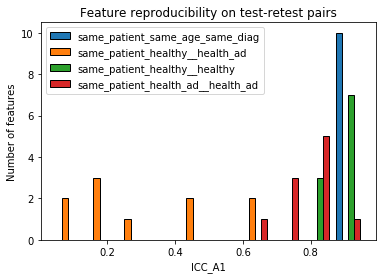

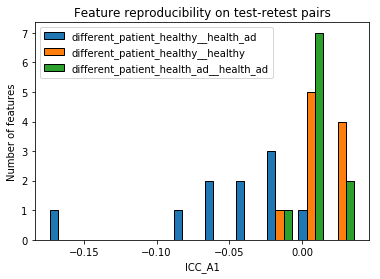

In [32]:
not_reg_not_zero = set(non_zero).intersection(not_reg)
feature_agreement(robustness_folder, not_reg_not_zero, "same_patient", "reg")
feature_agreement(robustness_folder, not_reg_not_zero, "different_patient", "not_reg")

In [33]:
non_zero_vals

[(120.470924, 89.25466),
 (144.19954, 111.66899),
 (114.16485, 93.14245),
 (166.7507, 114.82192),
 (168.0605, 177.16185),
 (135.95792, 112.05454),
 (150.66196, 101.7656),
 (130.27661, 100.91517),
 (158.59818, 113.00121),
 (126.33637, 115.85051),
 (148.77577, 106.43864),
 (126.66086, 103.36445),
 (131.36137, 109.49163),
 (124.12544, 97.01069),
 (109.898506, 109.69154),
 (135.76407, 104.42723),
 (154.72508, 115.57374),
 (178.27815, 123.403114)]